In [1]:
import pandas as pd

# Load the datasets
file1_path = "C:/Users/karnakar reddy/Downloads/Telegram Desktop/Mental_Health_Citywise_India (3).csv"
file2_path = "C:/Users/karnakar reddy/Downloads/Telegram Desktop/updated_merged_2018_2022.csv"

# Read the CSV files
df_mental_health = pd.read_csv(file1_path)
df_noise_pollution = pd.read_csv(file2_path)

# Display basic information about the datasets
df_mental_health.info(), df_noise_pollution.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   City                           15 non-null     object 
 1   State                          15 non-null     object 
 2   Lifetime mental morbidity (%)  15 non-null     float64
 3   Current mental morbidity (%)   15 non-null     float64
 4   Tobacco use (%)                15 non-null     float64
 5   Suicidal risk (%)              15 non-null     float64
 6   Alcohol use (%)                15 non-null     float64
 7   Stress Level (1-10)            15 non-null     float64
 8   Sleep Disorders (%)            15 non-null     float64
 9   Anxiety Levels (1-10)          15 non-null     float64
dtypes: float64(8), object(2)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column      Non-Nu

(None, None)

In [2]:

# Standardize column names (trim spaces and lowercase conversion)
df_mental_health.columns = df_mental_health.columns.str.strip()
df_noise_pollution.columns = df_noise_pollution.columns.str.strip()

df_mental_health["City"] = df_mental_health["City"].str.strip().str.lower()
df_mental_health["State"] = df_mental_health["State"].str.strip().str.lower()
df_noise_pollution["City"] = df_noise_pollution["City"].str.strip().str.lower()
df_noise_pollution["State"] = df_noise_pollution["State"].str.strip().str.lower()

# Fix incorrect state mappings in the mental health dataset
state_corrections = {
    "mumbai": "maharashtra",
    "delhi": "delhi",
    "kolkata": "west bengal",
    "chennai": "tamil nadu",
    "hyderabad": "telangana",
    "lucknow": "uttar pradesh"
}
df_mental_health.loc[:, "State"] = df_mental_health["City"].map(state_corrections).fillna(df_mental_health["State"])

# Filter relevant columns from noise pollution dataset
df_noise_pollution_filtered = df_noise_pollution[["City", "State", "Day", "Night"]]

# Merge datasets (ignore Year column in noise dataset)
df_merged = pd.merge(df_mental_health, df_noise_pollution_filtered, on=["City", "State"], how="inner")

# Display merged dataset
df_merged.head()


,City,State,Lifetime mental morbidity (%),Current mental morbidity (%),Tobacco use (%),Suicidal risk (%),Alcohol use (%),Stress Level (1-10),Sleep Disorders (%),Anxiety Levels (1-10),Day,Night
0,mumbai,maharashtra,13.671467,12.101777,11.238469,5.965996,11.554211,6.001558,19.883173,6.704889,63.546296,59.740741
1,mumbai,maharashtra,13.671467,12.101777,11.238469,5.965996,11.554211,6.001558,19.883173,6.704889,63.546296,59.740741
2,mumbai,maharashtra,13.671467,12.101777,11.238469,5.965996,11.554211,6.001558,19.883173,6.704889,63.546296,59.740741
3,delhi,delhi,20.021230,11.700999,5.379590,8.026605,5.053153,6.770833,5.239494,4.385363,61.325000,57.033333
4,delhi,delhi,20.021230,11.700999,5.379590,8.026605,5.053153,6.770833,5.239494,4.385363,61.325000,57.033333


Columns in merged dataset: Index(['City', 'State', 'Lifetime mental morbidity (%)',
       'Current mental morbidity (%)', 'Tobacco use (%)', 'Suicidal risk (%)',
       'Alcohol use (%)', 'Stress Level (1-10)', 'Sleep Disorders (%)',
       'Anxiety Levels (1-10)', 'Day', 'Night'],
      dtype='object')


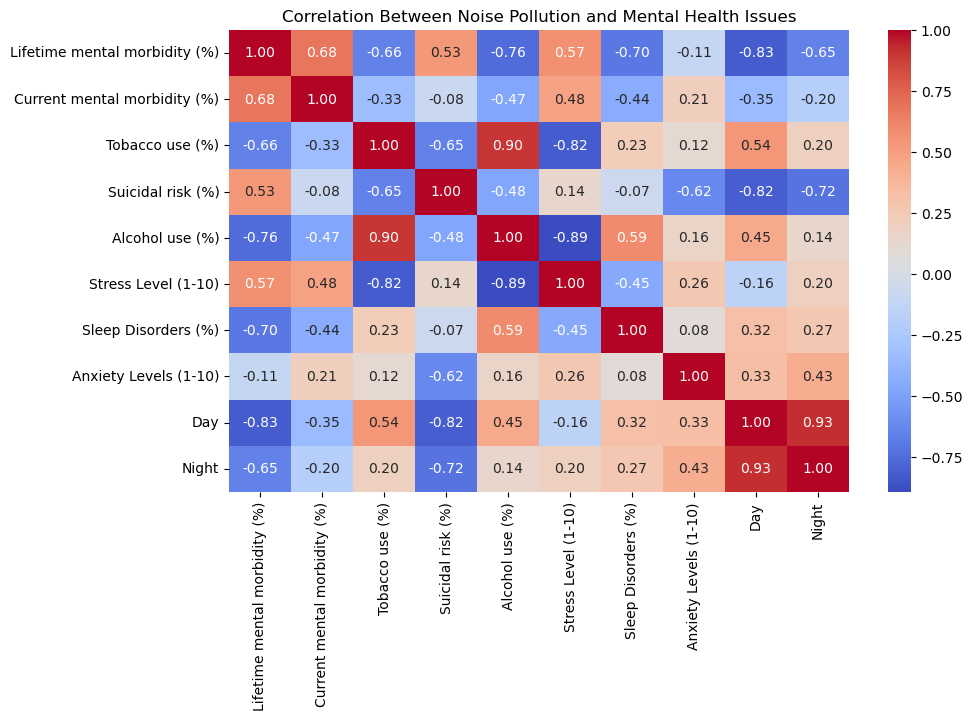

Missing columns: ['Stress Levels', 'Anxiety Levels']. Cannot generate scatter plots.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check available columns
print("Columns in merged dataset:", df_merged.columns)

# Correlation Analysis (only numerical columns)
df_merged_numeric = df_merged.select_dtypes(include=["number"])
if not df_merged_numeric.empty:
    correlation_matrix = df_merged_numeric.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Between Noise Pollution and Mental Health Issues")
    plt.savefig("correlation_heatmap.png", bbox_inches='tight', dpi=300)  # Save the heatmap
    plt.show()
else:
    print("No numeric columns available for correlation analysis.")

# Scatter Plots (Check column names before plotting)
expected_columns = ["Stress Levels", "Anxiety Levels", "Day", "Night"]
missing_columns = [col for col in expected_columns if col not in df_merged.columns]

if not missing_columns:
    # Scatter plot for Daytime Noise Level vs. Stress Levels
    plt.figure(figsize=(12, 5))
    sns.scatterplot(x=df_merged["Day"], y=df_merged["Stress Levels"], hue=df_merged["City"], palette="viridis")
    plt.xlabel("Daytime Noise Level (dB)")
    plt.ylabel("Stress Levels")
    plt.title("Effect of Daytime Noise on Stress Levels")
    plt.savefig("daytime_noise_vs_stress.png", bbox_inches='tight', dpi=300)  # Save the scatter plot
    plt.show()

    # Scatter plot for Nighttime Noise Level vs. Anxiety Levels
    plt.figure(figsize=(12, 5))
    sns.scatterplot(x=df_merged["Night"], y=df_merged["Anxiety Levels"], hue=df_merged["City"], palette="plasma")
    plt.xlabel("Nighttime Noise Level (dB)")
    plt.ylabel("Anxiety Levels")
    plt.title("Effect of Nighttime Noise on Anxiety Levels")
    plt.savefig("nighttime_noise_vs_anxiety.png", bbox_inches='tight', dpi=300)  # Save the scatter plot
    plt.show()
else:
    print(f"Missing columns: {missing_columns}. Cannot generate scatter plots.")


In [6]:
import os
print(os.getcwd())


C:\Users\karnakar reddy


In [7]:
df_mental_health = df_mental_health.rename(columns={"Stress_Level": "Stress Levels", "Anxiety": "Anxiety Levels"}).copy()


In [8]:
df_mental_health.rename(columns={"Stress_Level": "Stress Levels", "Anxiety": "Anxiety Levels"}, inplace=True)
print("After renaming:", df_mental_health.columns)


After renaming: Index(['City', 'State', 'Lifetime mental morbidity (%)',
       'Current mental morbidity (%)', 'Tobacco use (%)', 'Suicidal risk (%)',
       'Alcohol use (%)', 'Stress Level (1-10)', 'Sleep Disorders (%)',
       'Anxiety Levels (1-10)'],
      dtype='object')


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plots (Check column names before plotting)
if "stress level (1-10)" in df_merged.columns and "anxiety levels (1-10)" in df_merged.columns:
    plt.figure(figsize=(12, 5))
    sns.scatterplot(x=df_merged["Day"], y=df_merged["stress level (1-10)"], hue=df_merged["City"], palette="viridis")
    plt.xlabel("Daytime Noise Level (dB)")
    plt.ylabel("Stress Levels")
    plt.title("Effect of Daytime Noise on Stress Levels")
    plt.show()

    sns.scatterplot(x=df_merged["Night"], y=df_merged["anxiety levels (1-10)"], hue=df_merged["City"], palette="plasma")
    plt.xlabel("Nighttime Noise Level (dB)")
    plt.ylabel("Anxiety Levels")
    plt.title("Effect of Nighttime Noise on Anxiety Levels")
    plt.show()
else:
    print("Columns 'stress level (1-10)' or 'anxiety levels (1-10)' not found in merged dataset.")


Columns 'stress level (1-10)' or 'anxiety levels (1-10)' not found in merged dataset.


In [10]:
df_mental_health.rename(columns={"city": "City", "state": "State"}, inplace=True)


In [11]:
df_merged = pd.merge(df_mental_health, df_noise_pollution_filtered, on=["City", "State"], how="inner")


In [12]:
print(df_merged.columns)


Index(['City', 'State', 'Lifetime mental morbidity (%)',
       'Current mental morbidity (%)', 'Tobacco use (%)', 'Suicidal risk (%)',
       'Alcohol use (%)', 'Stress Level (1-10)', 'Sleep Disorders (%)',
       'Anxiety Levels (1-10)', 'Day', 'Night'],
      dtype='object')


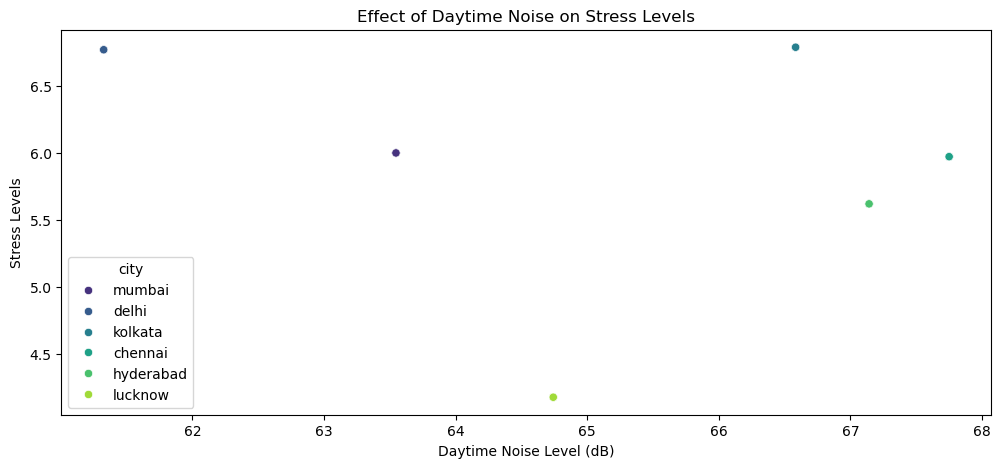

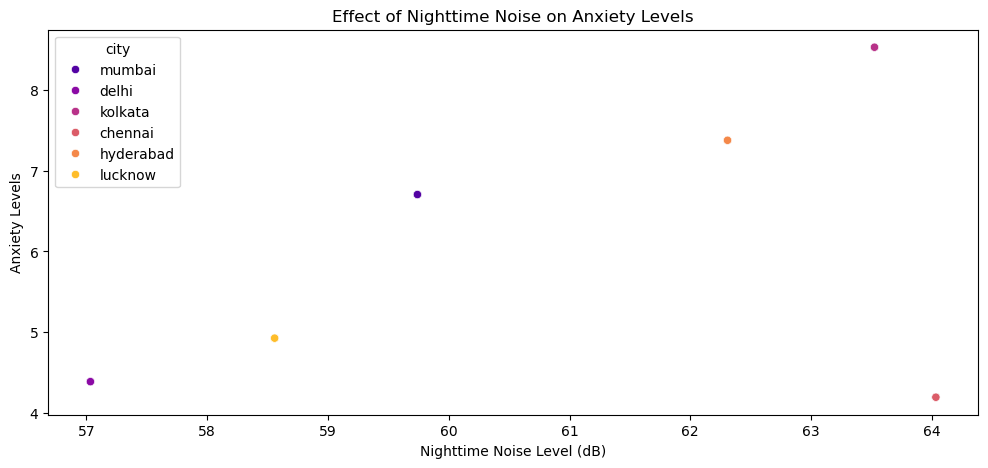

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert column names to lowercase for consistency
df_merged.columns = df_merged.columns.str.lower()

# Scatter Plot for Daytime Noise Level vs. Stress Levels
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_merged["day"], y=df_merged["stress level (1-10)"], hue=df_merged["city"], palette="viridis")
plt.xlabel("Daytime Noise Level (dB)")
plt.ylabel("Stress Levels")
plt.title("Effect of Daytime Noise on Stress Levels")
plt.savefig("daytime_noise_vs_stress.png", bbox_inches='tight', dpi=300)  # Save the plot as an image file
plt.show()

# Scatter Plot for Nighttime Noise Level vs. Anxiety Levels
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_merged["night"], y=df_merged["anxiety levels (1-10)"], hue=df_merged["city"], palette="plasma")
plt.xlabel("Nighttime Noise Level (dB)")
plt.ylabel("Anxiety Levels")
plt.title("Effect of Nighttime Noise on Anxiety Levels")
plt.savefig("nighttime_noise_vs_anxiety.png", bbox_inches='tight', dpi=300)  # Save the plot as an image file
plt.show()


In [15]:
day_noise = df_merged["day"].to_numpy()
night_noise = df_merged["night"].to_numpy()


In [16]:
df_merged.rename(columns={"day": "Day", "night": "Night"}, inplace=True)


In [17]:
df_merged.rename(columns={"city": "City", "state": "State"}, inplace=True)


In [18]:
print(df_merged.columns)


Index(['City', 'State', 'lifetime mental morbidity (%)',
       'current mental morbidity (%)', 'tobacco use (%)', 'suicidal risk (%)',
       'alcohol use (%)', 'stress level (1-10)', 'sleep disorders (%)',
       'anxiety levels (1-10)', 'Day', 'Night'],
      dtype='object')


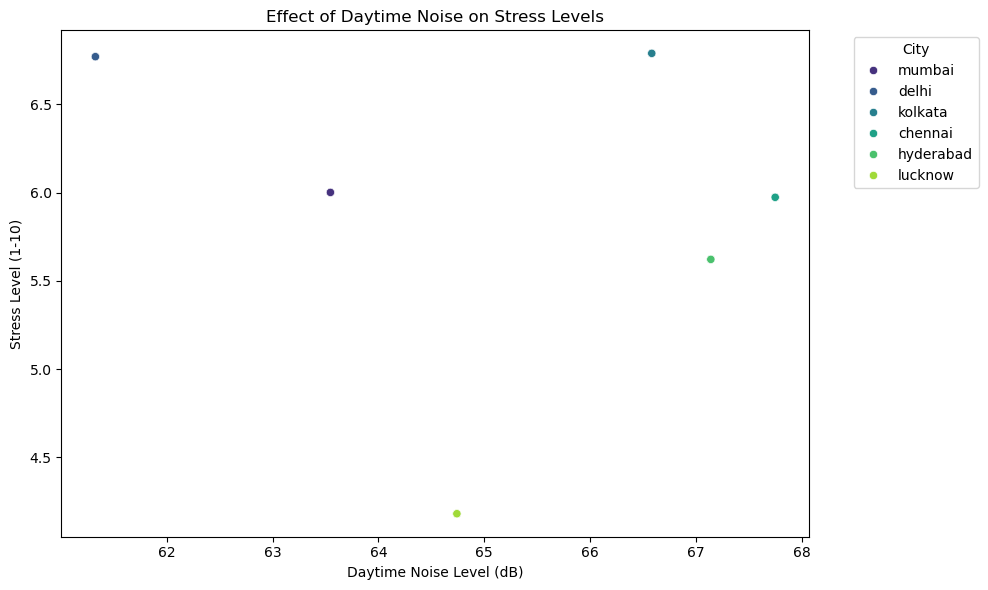

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_merged is your DataFrame
if "City" in df_merged.columns:
    plt.figure(figsize=(10, 6))  # Optional: Set the figure size
    scatter_plot = sns.scatterplot(
        x=df_merged["Day"],
        y=df_merged["stress level (1-10)"],
        hue=df_merged["City"],
        palette="viridis"
    )
    plt.xlabel("Daytime Noise Level (dB)")
    plt.ylabel("Stress Level (1-10)")
    plt.title("Effect of Daytime Noise on Stress Levels")
    plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.savefig("daytime_noise_stress_scatterplot.png", bbox_inches='tight', dpi=300)
    plt.show()
else:
    print("Column 'City' not found in merged dataset.")


In [20]:
print(df_merged.columns)


Index(['City', 'State', 'lifetime mental morbidity (%)',
       'current mental morbidity (%)', 'tobacco use (%)', 'suicidal risk (%)',
       'alcohol use (%)', 'stress level (1-10)', 'sleep disorders (%)',
       'anxiety levels (1-10)', 'Day', 'Night'],
      dtype='object')


In [22]:
    # Regression Analysis
from scipy import stats
print("\nLinear Regression Analysis:\n")
day_noise = df_merged["Day"].to_numpy()
stress_levels = df_merged["stress level (1-10)"].to_numpy()
night_noise = df_merged["Night"].to_numpy()
anxiety_levels = df_merged["anxiety levels (1-10)"].to_numpy()

slope, intercept, r_value, p_value, std_err = stats.linregress(day_noise, stress_levels)
print(f"Daytime Noise vs Stress Levels: Slope={slope:.3f}, Intercept={intercept:.3f}, R-squared={r_value**2:.3f}, p-value={p_value:.3f}")

slope, intercept, r_value, p_value, std_err = stats.linregress(night_noise, anxiety_levels)
print(f"Nighttime Noise vs Anxiety Levels: Slope={slope:.3f}, Intercept={intercept:.3f}, R-squared={r_value**2:.3f}, p-value={p_value:.3f}")



Linear Regression Analysis:

Daytime Noise vs Stress Levels: Slope=-0.062, Intercept=9.947, R-squared=0.025, p-value=0.528
Nighttime Noise vs Anxiety Levels: Slope=0.269, Intercept=-10.330, R-squared=0.184, p-value=0.075


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_merged is your DataFrame

# Create and save the first regression plot
plt.figure()  # Create a new figure
sns.regplot(x=df_merged["Day"], y=df_merged["stress level (1-10)"], scatter=True, line_kws={"color": "red"})
plt.title("Daytime Noise vs. Stress Levels")
plt.xlabel("Daytime Noise Level (dB)")
plt.ylabel("Stress Level (1-10)")
plt.savefig("daytime_noise_vs_stress_levels.png", bbox_inches='tight', dpi=300)
plt.close()  # Close the figure to free up memory

# Create and save the second regression plot
plt.figure()  # Create a new figure
sns.regplot(x=df_merged["Night"], y=df_merged["anxiety levels (1-10)"], scatter=True, line_kws={"color": "red"})
plt.title("Nighttime Noise vs. Anxiety Levels")
plt.xlabel("Nighttime Noise Level (dB)")
plt.ylabel("Anxiety Level (1-10)")
plt.savefig("nighttime_noise_vs_anxiety_levels.png", bbox_inches='tight', dpi=300)
plt.close()  # Close the figure to free up memory


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(day_noise.reshape(-1, 1))
model = LinearRegression().fit(X_poly, stress_levels)
print("Polynomial Regression Coefficients:", model.coef_)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
from numpy.polynomial.polynomial import Polynomial

# Regression Analysis
if "stress level (1-10)" in df_merged.columns and "anxiety levels (1-10)" in df_merged.columns:
    # Regression Analysis
    print("\nLinear Regression Analysis:\n")
    day_noise = df_merged["Day"].to_numpy()
    stress_levels = df_merged["stress level (1-10)"].to_numpy()
    night_noise = df_merged["Night"].to_numpy()
    anxiety_levels = df_merged["anxiety levels (1-10)"].to_numpy()
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(day_noise, stress_levels)
    print(f"Daytime Noise vs Stress Levels: Slope={slope:.3f}, Intercept={intercept:.3f}, R-squared={r_value**2:.3f}, p-value={p_value:.3f}")
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(night_noise, anxiety_levels)
    print(f"Nighttime Noise vs Anxiety Levels: Slope={slope:.3f}, Intercept={intercept:.3f}, R-squared={r_value**2:.3f}, p-value={p_value:.3f}")
    
    # Polynomial Regression Coefficients
    coefs_day = np.polyfit(day_noise, stress_levels, 2)
    coefs_night = np.polyfit(night_noise, anxiety_levels, 2)
    print("\nPolynomial Regression Coefficients:")
    print(f"Daytime Noise vs Stress Levels: [{coefs_day[2]:.8f} {coefs_day[1]:.8f} {coefs_day[0]:.8f}]")
    print(f"Nighttime Noise vs Anxiety Levels: [{coefs_night[2]:.8f} {coefs_night[1]:.8f} {coefs_night[0]:.8f}]")
else:
    print("Columns 'stress level (1-10)' or 'anxiety levels (1-10)' not found in merged dataset.")
